In [1]:
from mdagent import MDAgent
import os 
import mdtraj as md

In [2]:
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), '../..'))
sys.path.append(parent_dir)
from robustness_prompts import get_prompt

prompt_6_descriptive = get_prompt("descriptive", 6)
prompt_6_natural = get_prompt("natural", 6)

prompt_6_descriptive, prompt_6_natural

('Complete all of the following tasks: 1. Download the PDB file 1LYZ. 2. Report the secondary structure assignments of the downloaded PDB structure. 3. Simulate for 1 ps at 300 K. 4. Compute the RMSD. 5. Compute the radius of gyration over time. 6. Compute the SASA (solvent accessible surface area).',
 'Simulate 1LYZ for 1 ps at 300 K. Report the secondary structure assignments of the downloaded PDB structure, and compute the RMSD, SASA, and radius of gyration of the simulation.')

In [3]:
llm_model = "claude-3-5-sonnet-20240620"
tools = "all"

In [4]:
agent_1 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_1.run(prompt_6_descriptive)

Thought: To complete all the tasks, I'll need to use several tools in sequence. Let's start with downloading the PDB file 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we've successfully downloaded the PDB file for 1LYZ. Now, let's move on to the second task, which is to report the secondary structure assignments of the downloaded PDB structure.

Action:
```
{
    "action": "ComputeDSSP",
    "action_input": {
        "traj_file": "1LYZ_222759",
        "target_frames": "first"
    }
}
```Thought: We've successfully obtained the secondary structure assignments for 1LYZ. Now, let's move on to the third task, which is to simulate the protein for 1 ps at 300 K.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_222759",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "system_params": {
            "nonbondedMethod": "PME

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [5]:
registry_1 = agent_1.path_registry
print(registry_1.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_222759: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_222759
 rec0_222801: dssp values for trajectory with id: 1LYZ_222759
 1LYZ_222813: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_222817: Initial positions for simulation sim0_222817
 sim0_222817: Basic Simulation of Protein 1LYZ_222813
 rec0_222817: Simulation trajectory for protein 1LYZ_222813 and simulation sim0_222817
 rec1_222817: Simulation state log for protein 1LYZ_222813 and simulation sim0_222817
 rec2_222817: Simulation pdb frames for protein 1LYZ_222813 and simulation sim0_222817
 rmsd_222817: RMSD for 222817
 fig0_222910: RMSD plot for 222817
 rgy_rec0_222817: Radii of gyration per frame for rec0_222817
 fig0_222913: Plot of radii of gyration over time for rec0_222817
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_222954: Plot of SASA over time for 1LYZ


In [6]:
# make sure pdb was downloaded
assert os.path.exists(registry_1.get_mapped_path("1LYZ_222759"))

In [7]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_1)
dssp._run(traj_file= "1LYZ_222759", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [8]:
# make sure trajectory and topology exist
traj_path_1 = registry_1.get_mapped_path("rec0_222817")
top_path_1 = registry_1.get_mapped_path("top_sim0_222817")

assert os.path.exists(traj_path_1)
assert os.path.exists(top_path_1)

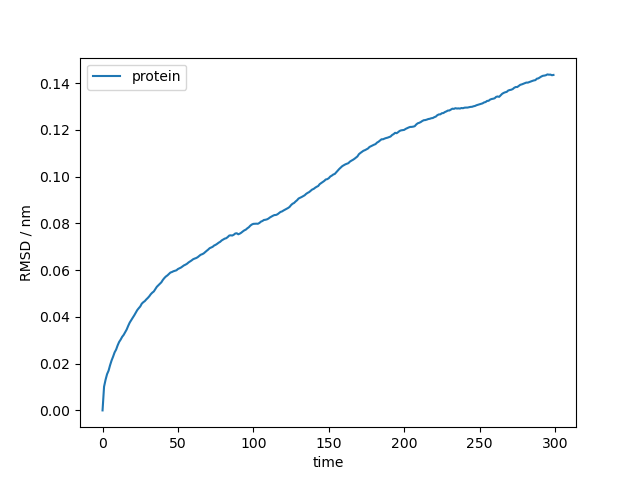

In [9]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_222910'))

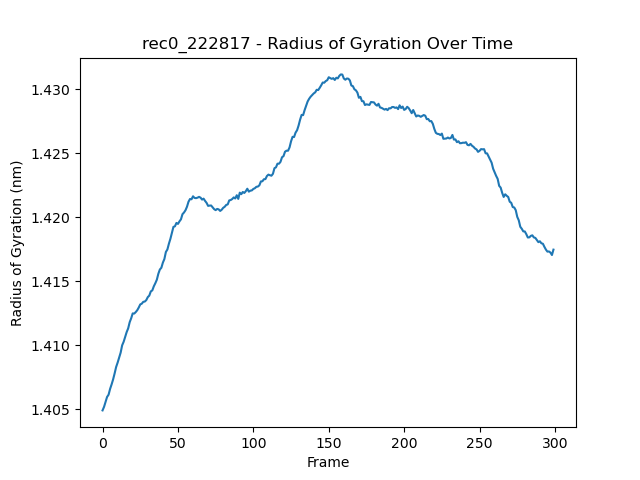

In [10]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_222913'))

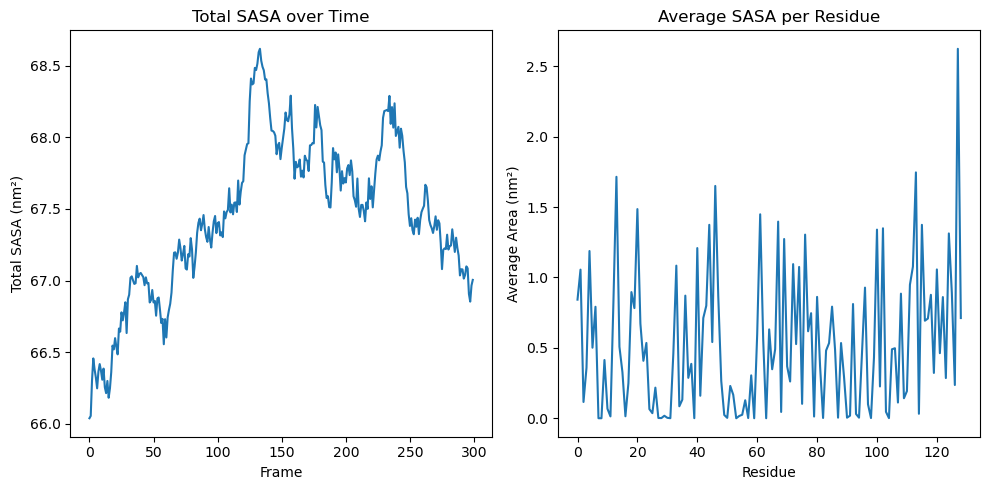

In [11]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_1.get_mapped_path('fig0_222954'))

In [12]:
agent_2 = MDAgent(agent_type="Structured", model=llm_model, top_k_tools=tools, use_memory=False)
agent_2.run(prompt_6_natural)

Thought: To complete this task, I need to follow these steps:
1. Download the PDB file for 1LYZ
2. Set up and run a simulation for 1 ps at 300 K
3. Analyze the secondary structure of the downloaded PDB
4. Compute RMSD, SASA, and radius of gyration from the simulation

Let's start by downloading the PDB file for 1LYZ.

Action:
```
{
    "action": "PDBFileDownloader",
    "action_input": "1LYZ"
}
```PDB file found with this ID: 1LYZ
Thought: Great, we have successfully downloaded the PDB file for 1LYZ. Now, let's set up and run a simulation for 1 ps at 300 K using this PDB file.

Action:
```
{
    "action": "SetUpandRunFunction",
    "action_input": {
        "pdb_id": "1LYZ_223154",
        "forcefield_files": ["amber14-all.xml", "amber14/tip3pfb.xml"],
        "system_params": {
            "nonbondedMethod": "PME",
            "nonbondedCutoff": "1 * nanometers",
            "constraints": "HBonds",
            "rigidWater": true,
            "ewaldErrorTolerance": 0.0005,
           

({'input': '\n    You are an expert molecular dynamics scientist, and\n    your task is to respond to the question or\n    solve the problem to the best of your ability using\n    the provided tools.\n\n    You can only respond with a single complete\n    \'Thought, Action, Action Input\' format\n    OR a single \'Final Answer\' format.\n\n    Complete format:\n    Thought: (reflect on your progress and decide what to do next)\n    Action:\n    ```\n    {\n        "action": (the action name, it should be the name of a tool),\n        "action_input": (the input string for the action)\n    }\n    \'\'\'\n\n    OR\n\n    Final Answer: (the final response to the original input\n    question, once all steps are complete)\n\n    You are required to use the tools provided,\n    using the most specific tool\n    available for each action.\n    Your final answer should contain all information\n    necessary to answer the question and its subquestions.\n    Before you finish, reflect on your pro

<Figure size 640x480 with 0 Axes>

In [13]:
registry_2 = agent_2.path_registry
print(registry_2.list_path_names_and_descriptions().replace(",", "\n"))

Files found in registry: 1LYZ_223154: PDB file downloaded from RSCB
 PDBFile ID: 1LYZ_223154
 1LYZ_223204: Cleaned File:  Removed Heterogens
 and Water Removed.  Replaced Nonstandard Residues. Added Hydrogens at pH 7.0. Missing Atoms Added and replaces nonstandard residues. 
 top_sim0_223209: Initial positions for simulation sim0_223209
 sim0_223209: Basic Simulation of Protein 1LYZ_223204
 rec0_223209: Simulation trajectory for protein 1LYZ_223204 and simulation sim0_223209
 rec1_223209: Simulation state log for protein 1LYZ_223204 and simulation sim0_223209
 rec2_223209: Simulation pdb frames for protein 1LYZ_223204 and simulation sim0_223209
 rec0_223244: dssp values for trajectory with id: 1LYZ_223204
 rmsd_1LYZ: RMSD for 1LYZ
 fig0_223247: RMSD plot for 1LYZ
 sasa_1LYZ: Total SASA values for 1LYZ
 fig0_223323: Plot of SASA over time for 1LYZ
 rgy_rec0_223209: Radii of gyration per frame for rec0_223209
 fig0_223326: Plot of radii of gyration over time for rec0_223209


In [ ]:
# make sure pdb was downloaded
assert os.path.exists(registry_2.get_mapped_path("1LYZ_223154")) 

In [14]:
# make sure dssp was computed correctly
from mdagent.tools.base_tools import ComputeDSSP

dssp = ComputeDSSP(registry_2)
dssp._run(traj_file= "1LYZ_223154", target_frames="first")

"{'residues in helix': 50, 'residues in strand': 14, 'residues in coil': 65, 'residues not assigned, not a protein residue': 101}"

In [15]:
# make sure trajectory and topology exist
traj_path_2 = registry_2.get_mapped_path("rec0_223209")
top_path_2 = registry_2.get_mapped_path("top_sim0_223209")

assert os.path.exists(traj_path_2)
assert os.path.exists(top_path_2)

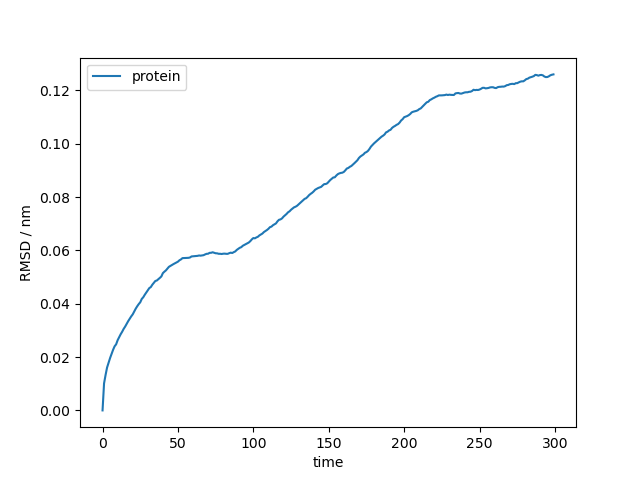

In [18]:
# make sure rmsd plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_223247'))

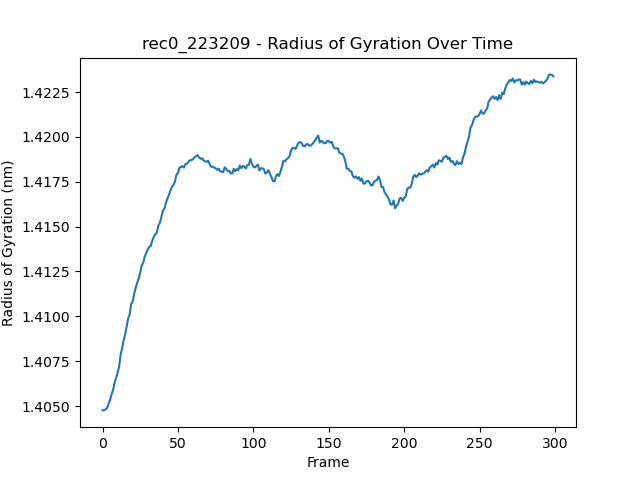

In [19]:
# make sure rgy plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_223326'))

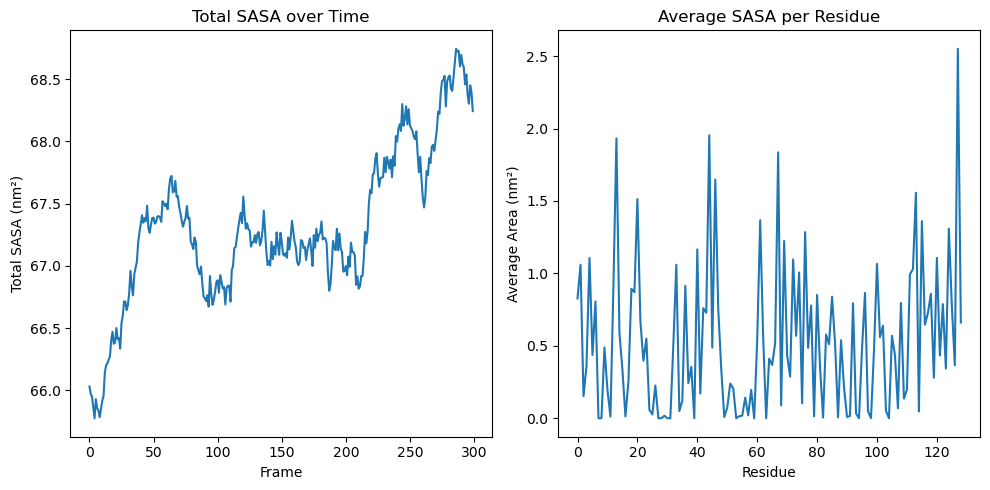

In [20]:
# make sure sasa plot was generated
from IPython.display import Image
Image(filename=registry_2.get_mapped_path('fig0_223323'))